Backpropagation is the fundamental algorithm used to train neural networks, enabling them to learn from data.
It relies on the gradient descent optimization method and functions by repeatedly updating the network's weights and biases to reduce the difference between its predicted outputs and the actual target values.
In this lab, you will build a neural network that uses backpropagation to solve the XOR problem.

# Objective for this notebook

* Train a Neural Network to Solve the XOR Problem
* Implement Backpropagation for Neural Network Training
* Demonstrate the Use of Activation Functions
* Understand the Learning Process Over Multiple Epochs
* Demonstrate Weight and Bias Adjustments via Gradient Descent
* Evaluate the Model's Performance After Training
* Monitor and Analyze the Training Process


# Table of Contents

1. Import Required Libraries
2. Initialize Inputs
3. Declare the network parameters
4. Define the weights  
5. Training the Neural Network  
6. Testing the Network  
7. Plot the error  

In [1]:
%pip install numpy==1.26.4
%pip install matplotlib==3.5.2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Required Libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Initialize Inputs
Define the input and expected output for a XOR gate problem


In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Declare the network parameters & the weights

Define the network parameters such as
1. number of input neurons
2. hidden layer neurons
3. output neurons
4. learning rate
5. number of epochs

Also, Declare the weights for the neurons. The initial weights are taken as random numbers which are then optimized by the backpropagation algorithm inside a function parameter `initialize_network_parameters()`


In [4]:
def initialize_network_parameters(inputSize, hiddenSize, outputSize, lr, epochs):
    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = (np.random.rand(hiddenSize, inputSize) * 2) - 1  # Weights from input to hidden layer
    b1 = (np.random.rand(hiddenSize, 1) * 2) - 1          # Bias for hidden layer
    w2 = (np.random.rand(outputSize, hiddenSize) * 2) - 1 # Weights from hidden to output layer
    b2 = (np.random.rand(outputSize, 1) * 2) - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs


## Training the Neural Network

The neural network works in 5 stages: 
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:



In [5]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters(2, 2, 1, 0.1, 180000)

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    # This line calculates how the error from the output layer (dz2) influences the hidden layer activations (a1).
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.05464
Epoch: 19999, Average error: 0.03086
Epoch: 29999, Average error: 0.02353
Epoch: 39999, Average error: 0.01969
Epoch: 49999, Average error: 0.01724
Epoch: 59999, Average error: 0.01551
Epoch: 69999, Average error: 0.01420
Epoch: 79999, Average error: 0.01318
Epoch: 89999, Average error: 0.01234
Epoch: 99999, Average error: 0.01164
Epoch: 109999, Average error: 0.01105
Epoch: 119999, Average error: 0.01054
Epoch: 129999, Average error: 0.01009
Epoch: 139999, Average error: 0.00969
Epoch: 149999, Average error: 0.00934
Epoch: 159999, Average error: 0.00902
Epoch: 169999, Average error: 0.00873
Epoch: 179999, Average error: 0.00847


## Testing the Network
After training, you can now test the neural network to verify that it has learned the XOR function and outputs the correct values close to [0, 1, 1, 0]


In [6]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))



Final output after training: [[0.00778859 0.99189786 0.99192274 0.00991678]]
Ground truth [0 1 1 0]
Error after training: [[-0.00778861  0.00810217  0.00807728 -0.00991681]]
Average error: 0.00847


## Plot the error
Here, we plot the error as a function of epochs. This shows how error changed over multiple iterations of forward and backward passes and how the network learnt over time


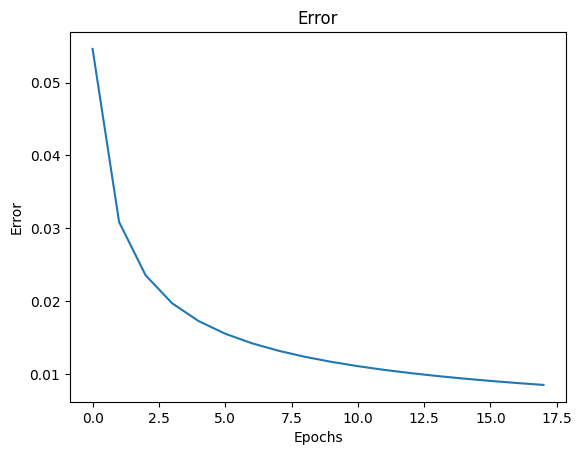

In [7]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Implement backpropagation for **AND problem** using similar input as used for XOR problem above and plot the error


Epoch: 9999, Average error: 0.02524
Epoch: 19999, Average error: 0.01509
Epoch: 29999, Average error: 0.01149
Epoch: 39999, Average error: 0.00955
Epoch: 49999, Average error: 0.00832
Epoch: 59999, Average error: 0.00744
Epoch: 69999, Average error: 0.00679
Epoch: 79999, Average error: 0.00627
Epoch: 89999, Average error: 0.00586
Epoch: 99999, Average error: 0.00551
Epoch: 109999, Average error: 0.00522
Epoch: 119999, Average error: 0.00496
Epoch: 129999, Average error: 0.00474
Epoch: 139999, Average error: 0.00455
Epoch: 149999, Average error: 0.00438
Epoch: 159999, Average error: 0.00422
Epoch: 169999, Average error: 0.00408
Epoch: 179999, Average error: 0.00395

Final output after training: [[1.15879084e-04 4.61898525e-03 4.22221423e-03 9.93148649e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00011588 -0.004619   -0.00422223  0.00685137]]
Average error: 0.00395


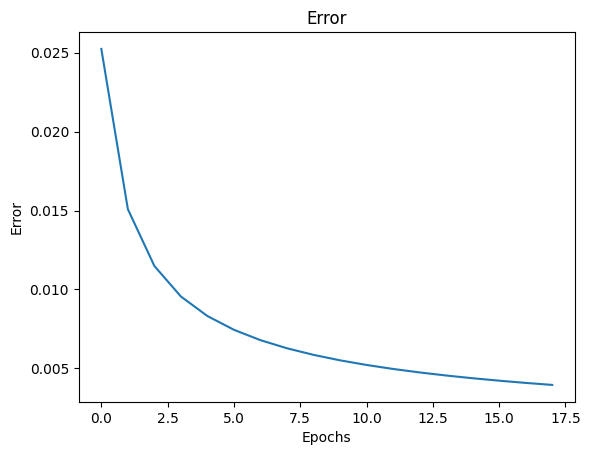

In [8]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
y = np.array([0, 0, 0, 1])

and_w1, and_b1, and_w2, and_b2, and_lr, and_epochs = initialize_network_parameters(2, 2, 1, 0.1, 180000)


# Training the network using backpropagation
error_list = []
for epoch in range(and_epochs):
    # Forward pass
    and_z1 = np.dot(and_w1, X) + and_b1  # Weighted sum for hidden layer
    and_a1 = 1 / (1 + np.exp(-and_z1))  # Sigmoid activation for hidden layer

    and_z2 = np.dot(and_w2, and_a1) + and_b2  # Weighted sum for output layer
    and_a2 = 1 / (1 + np.exp(-and_z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = y - and_a2  # Difference between expected and actual output
    and_da2 = error * (and_a2 * (1 - and_a2))  # Derivative for output layer
    and_dz2 = and_da2  # Gradient for output layer

    # Propagate error to hidden layer
    # This line calculates how the error from the output layer (dz2) influences the hidden layer activations (a1).
    and_da1 = np.dot(and_w2.T, and_dz2)  # Gradient for hidden layer
    and_dz1 = and_da1 * (and_a1 * (1 - and_a1))  # Derivative for hidden layer

    # Update weights and biases
    and_w2 += and_lr * np.dot(and_dz2, and_a1.T)  # Update weights from hidden to output layer
    and_b2 += and_lr * np.sum(and_dz2, axis=1, keepdims=True)  # Update bias for output layer

    and_w1 += and_lr * np.dot(and_dz1, X.T)  # Update weights from input to hidden layer
    and_b1 += and_lr * np.sum(and_dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
and_z1 = np.dot(and_w1, X) + and_b1  # Weighted sum for hidden layer
and_a1 = 1 / (1 + np.exp(-and_z1))  # Sigmoid activation for hidden layer

and_z2 = np.dot(and_w2, and_a1) + and_b2  # Weighted sum for output layer
and_a2 = 1 / (1 + np.exp(-and_z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', and_a2)
print('Ground truth', y)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Now, decrease the learning rate to 0.01 and increase the number of epochs to 1000000 and check the error for XOR gate


Epoch: 9999, Average error: 0.49855
Epoch: 19999, Average error: 0.48606
Epoch: 29999, Average error: 0.40731
Epoch: 39999, Average error: 0.33700
Epoch: 49999, Average error: 0.30951
Epoch: 59999, Average error: 0.29623
Epoch: 69999, Average error: 0.28845
Epoch: 79999, Average error: 0.28330
Epoch: 89999, Average error: 0.27961
Epoch: 99999, Average error: 0.27683
Epoch: 109999, Average error: 0.27465
Epoch: 119999, Average error: 0.27288
Epoch: 129999, Average error: 0.27141
Epoch: 139999, Average error: 0.27017
Epoch: 149999, Average error: 0.26911
Epoch: 159999, Average error: 0.26818
Epoch: 169999, Average error: 0.26737
Epoch: 179999, Average error: 0.26665
Epoch: 189999, Average error: 0.26600
Epoch: 199999, Average error: 0.26542
Epoch: 209999, Average error: 0.26489
Epoch: 219999, Average error: 0.26441
Epoch: 229999, Average error: 0.26397
Epoch: 239999, Average error: 0.26357
Epoch: 249999, Average error: 0.26319
Epoch: 259999, Average error: 0.26284
Epoch: 269999, Average 

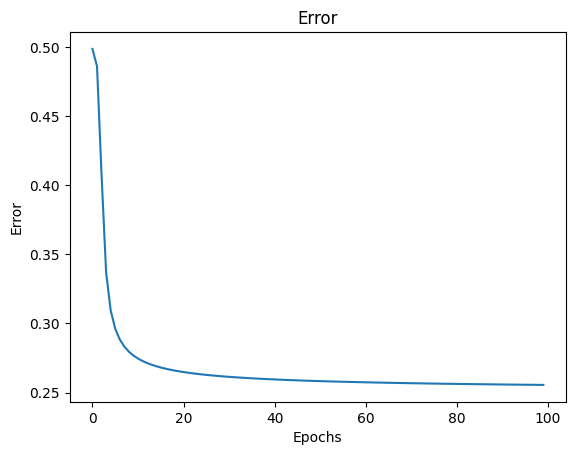

In [10]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters(2, 2, 1, 0.01, 1000000)

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    # This line calculates how the error from the output layer (dz2) influences the hidden layer activations (a1).
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()